# Analyse of sensors data 

In [5]:
import numpy as np
import pandas as pd

from pandas.api.types import CategoricalDtype

import os            # file operations
import requests      # networking
import zipfile
import io
from pathlib import Path

from datetime import date

In [6]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [7]:
np.set_printoptions(precision=2, suppress=True)
%matplotlib inline
pd.options.plotting.backend = "plotly"

In [12]:
params = dict(
    timecourse = '',    
    drypath = os.path.join('.', 'sensors_test_dry_nonisolated.csv'),
    moistpath = os.path.join('.', 'sensors_test_moist_nonisolated.csv')    
)

## Load data 



In [53]:
df_sens = pd.read_csv(params['drypath'], sep=',', names = [ 'sens0', 'sens1', 'sens2', 'sens3'])

df_sens = df_sens[~df_sens['sens0'].str.contains('-')]
df_sens = df_sens.astype(int)
df_sens.head(10)

,sens0,sens1,sens2,sens3
1,698,634,814,109
2,698,634,814,109
3,698,634,814,109
4,698,634,815,109
5,698,634,814,109
6,698,634,814,109
7,698,634,815,109
8,698,634,815,109
9,698,634,815,109
10,698,634,814,109


In [54]:
df_sens_m = pd.read_csv(params['moistpath'], sep=',', names = [ 'sens0', 'sens1', 'sens2', 'sens3'])

df_sens_m = df_sens_m[~df_sens_m['sens0'].str.contains('-')]
df_sens_m = df_sens_m.astype(int)

df_sens_m.head(10)

,sens0,sens1,sens2,sens3
1,253,264,335,65
2,253,264,335,65
3,254,264,335,64
4,254,264,335,64
5,254,264,335,63
6,254,264,335,63
7,254,264,335,63
8,254,264,335,63
9,254,264,335,62
10,253,264,335,62


## Dry statistics 



In [89]:
# Dry statistics
summary_stats = df_sens.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                        .highlight_max(subset=None, color='lightgreen', axis=0, props=None)
                       # .apply(lambda x: ['background: lightgreen' if (x.index == 'max') else '' for i in x], axis=1)
                       )

# Display
display(styled_summary_stats)

,sens0,sens1,sens2,sens3
count,100,100,100,100
mean,688,626,803,111
std,8,16,14,5
min,666,486,778,103
25%,681,625,789,108
50%,691,629,811,109
75%,694,633,814,118
max,711,635,818,119


## Moist statistics 



In [91]:
# Moist statistics
summary_stats = df_sens_m.describe()

# Apply some styling
styled_summary_stats = (summary_stats
                        .style.set_table_styles([{'selector': 'th', 'props': [('background', '#7ca6db'), ('color', 'white')]}])
                        .format("{:.0f}")
                        .set_caption("Summary Statistics")
                       # .highlight_max(subset=None, color='lightgreen', axis=0, props=None)       
                        )

# Display
display(styled_summary_stats)

,sens0,sens1,sens2,sens3
count,40,40,40,40
mean,250,260,330,56
std,4,4,6,6
min,245,255,321,50
25%,247,257,325,51
50%,250,260,331,55
75%,254,264,335,61
max,254,264,335,65


## Visualization 

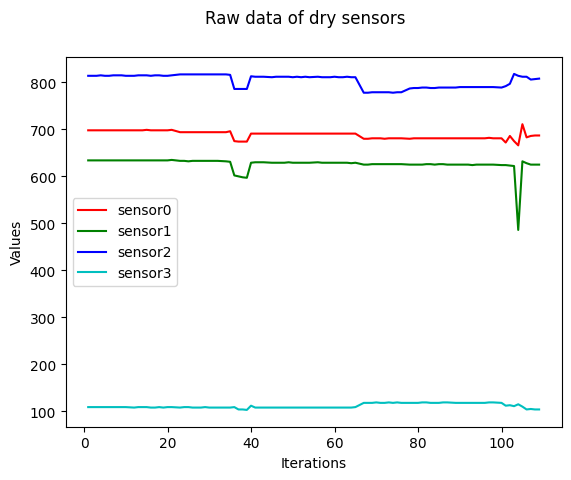

In [48]:
fig, ax = plt.subplots()   
ax.plot(df_sens['sens0'], label='sensor0', color='r')
ax.plot(df_sens['sens1'], label='sensor1', color='g')
ax.plot(df_sens['sens2'], label='sensor2', color='b')    
ax.plot(df_sens['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of dry sensors')
plt.show()

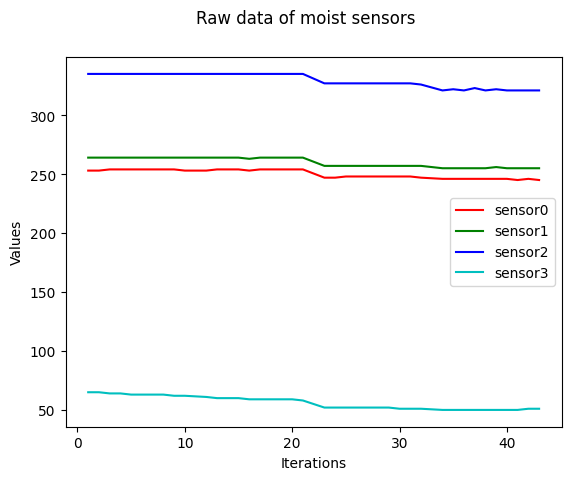

In [56]:
fig, ax = plt.subplots()   
ax.plot(df_sens_m['sens0'], label='sensor0', color='r')
ax.plot(df_sens_m['sens1'], label='sensor1', color='g')
ax.plot(df_sens_m['sens2'], label='sensor2', color='b')    
ax.plot(df_sens_m['sens3'], label='sensor3', color='c')  
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Values')
fig.suptitle('Raw data of moist sensors')
plt.show()